# Articles Analysis Engagement

This analysis cover an introduction for this investigation.

In [2]:
# Importing packages from our virtualenv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading file

We will use pandas to read our CSV file

In [4]:
FILENAME = 'dataset/articles_data_homeproject.csv'

df = pd.read_csv(FILENAME, index_col=0)

df.head()


,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


## Check Types

Check types, describe columns and review missing values

In [8]:
df.isnull().sum().to_frame()

,0
source_id,0
source_name,0
author,1020
title,2
description,24
url,1
url_to_image,656
published_at,1
content,1292
top_article,2


In [12]:
COLUMNS = [
    'source_name',
    'author',
    'engagement_reaction_count',
    'engagement_comment_count',
    'engagement_share_count',
    'engagement_comment_plugin_count' 
]

df = df[COLUMNS].dropna(axis=0, how='any')

In [14]:
engagement_reaction_count = df.groupby('source_name')['engagement_reaction_count'].sum()
engagement_reaction_count.to_frame()

,engagement_reaction_count
source_name,
ABC News,342936.0
Al Jazeera English,139383.0
BBC News,516902.0
Business Insider,216545.0
CBS News,459741.0
CNN,1188131.0
ESPN,0.0
Newsweek,93167.0
Reuters,16963.0


In [15]:
engagement_share_count = df.groupby('source_name')['engagement_share_count'].sum()
engagement_share_count.to_frame()

,engagement_share_count
source_name,
ABC News,82335.0
Al Jazeera English,35345.0
BBC News,193389.0
Business Insider,311678.0
CBS News,108152.0
CNN,305454.0
ESPN,0.0
Newsweek,29067.0
Reuters,647095.0


In [19]:
highest_source = df['source_name'].value_counts()
highest_source.to_frame()

,source_name
Reuters,1252
ABC News,1137
Business Insider,1048
The Irish Times,993
CNN,961
CBS News,941
The New York Times,869
BBC News,746
Newsweek,539
Al Jazeera English,471


## Data Visualization

Text(0.5, 1.0, 'Highest amount of news')

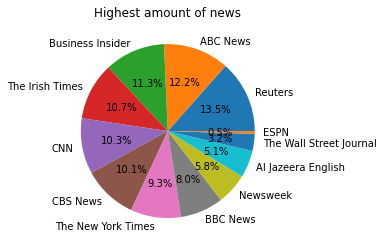

In [24]:
# Create list based on above frame
labels = list(highest_source.index.values)

plt.pie(highest_source, labels=labels, autopct='%1.1f%%')
plt.title('Highest amount of news')

In [27]:
top_5 = highest_source.head(5)
top_5.to_frame()

,source_name
Reuters,1252
ABC News,1137
Business Insider,1048
The Irish Times,993
CNN,961


Text(0.5, 1.0, 'Highest amount of news - Top 5')

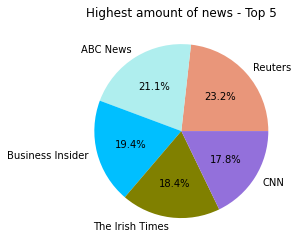

In [33]:
labels = list(top_5.index.values)
colors = ['DarkSalmon', 'PaleTurquoise','DeepSkyBlue','Olive','MediumPurple']

plt.pie(top_5, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Highest amount of news - Top 5')